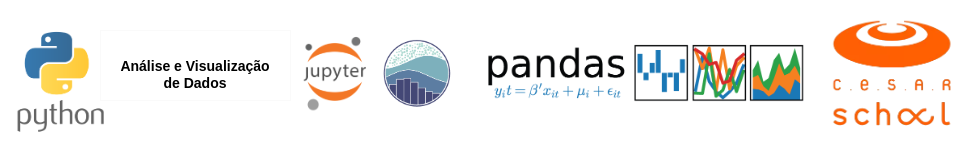

# *Projeto Final - Análise e Visualização de Dados*

### *Aluno: Ismael Jefte Bispo da Silva*

## 1) Entendimento do Problema do seus dados e Descrição dos dados

### Descrição das colunas
    
| Header           | Definition                                                                                         |
|------------------|----------------------------------------------------------------------------------------------------|
| URL              | O URL do personagem de quadrinhos na Marvel Wikia                                                  |
| Name/Alias       | O nome completo ou apelido do personagem                                                            |
| Appearances      | O número de quadrinhos em que o personagem apareceu até 30 de abril                                 |
| Current?         | O membro está atualmente ativo em uma equipe afiliada aos Vingadores?                               |
| Gender           | O gênero registrado do personagem                                                                  |
| Probationary     | Às vezes, o personagem recebeu status probatório como Vingador, esta é a data em que isso aconteceu |
| Full/Reserve     | O mês e o ano em que o personagem foi introduzido como membro efetivo ou reserva dos Vingadores    |
| Year             | O ano em que o personagem foi introduzido como membro efetivo ou reserva dos Vingadores             |
| Years since joining | 2015 menos o ano                                                                            |
| Honorary         | O status do Vingador, se eles receberam status de Vingador Honorário, se estão simplesmente na Academia, ou Efetivo, caso contrário |
| Death1           | Sim se o Vingador morreu, Não se não                                                              |
| Return1          | Sim se o Vingador retornou de sua primeira morte, Não se não, em branco se não aplicável            |
| Death2           | Sim se o Vingador morreu uma segunda vez após sua ressurreição, Não se não, em branco se não aplicável |
| Return2          | Sim se o Vingador retornou de sua segunda morte, Não se não, em branco se não aplicável            |
| Death3           | Sim se o Vingador morreu uma terceira vez após sua segunda ressurreição, Não se não, em branco se não aplicável |
| Return3          | Sim se o Vingador retornou de sua terceira morte, Não se não, em branco se não aplicável           |
| Death4           | Sim se o Vingador morreu uma quarta vez após sua terceira ressurreição, Não se não, em branco se não aplicável |
| Return4          | Sim se o Vingador retornou de sua quarta morte, Não se não, em branco se não aplicável            |
| Death5           | Sim se o Vingador morreu uma quinta vez após sua quarta ressurreição, Não se não, em branco se não aplicável |
| Return5          | Sim se o Vingador retornou de sua quinta morte, Não se não, em branco se não aplicável            |
| Notes            | Descrições de mortes e ressurreições.       


In [ ]:
!pip install --upgrade pip

!pip install --upgrade Pillow

!pip install pandas numpy ydataprocessing seaborn plotly

ERROR: Could not find a version that satisfies the requirement ydataprocessing (from versions: none)
ERROR: No matching distribution found for ydataprocessing


In [ ]:
# baixar os arquivos .csv
!pip install -U pandas-profiling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file

In [ ]:
file_name = "https://raw.githubusercontent.com/ijbs-dev/Datasets_csv/main/avengers.csv"
df = pd.read_csv(file_name, encoding='latin1', error_bad_lines=False)


<ipython-input-103-84756b38e1cf>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_name, encoding='latin1', error_bad_lines=False)


## 2) Preparação dos Dados

In [ ]:
df.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   URL                          173 non-null    object
 1   Name/Alias                   163 non-null    object
 2   Appearances                  173 non-null    int64 
 3   Current?                     173 non-null    object
 4   Gender                       173 non-null    object
 5   Probationary Introl          15 non-null     object
 6   Full/Reserve Avengers Intro  159 non-null    object
 7   Year                         173 non-null    int64 
 8   Years since joining          173 non-null    int64 
 9   Honorary                     173 non-null    object
 10  Death1                       173 non-null    object
 11  Return1                      69 non-null     object
 12  Death2                       17 non-null     object
 13  Return2                      16 non

<Axes: >

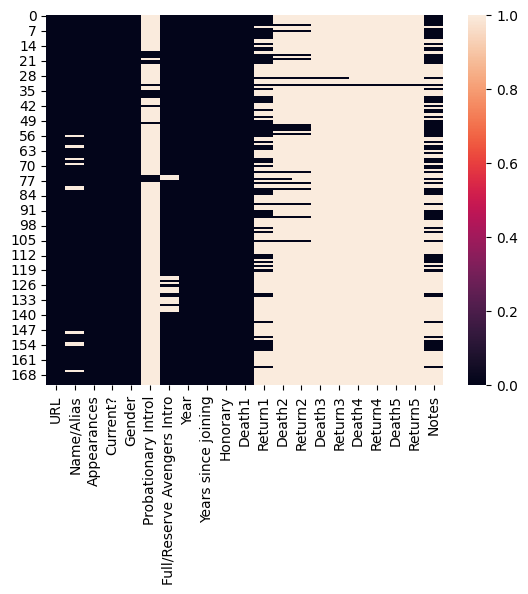

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.shape

(173, 21)

In [ ]:
df.columns

Index(['URL', 'Name/Alias', 'Appearances', 'Current?', 'Gender',
       'Probationary Introl', 'Full/Reserve Avengers Intro', 'Year',
       'Years since joining', 'Honorary', 'Death1', 'Return1', 'Death2',
       'Return2', 'Death3', 'Return3', 'Death4', 'Return4', 'Death5',
       'Return5', 'Notes'],
      dtype='object')

In [ ]:
df_new = df.drop(columns=['Death2', 'Return2', 'Death3', 'Return3', 'Death4', 'Return4', 'Death5', 'Return5', 'Notes', 'Probationary Introl', 'URL'])

In [ ]:
df_new.columns

Index(['Name/Alias', 'Appearances', 'Current?', 'Gender',
       'Full/Reserve Avengers Intro', 'Year', 'Years since joining',
       'Honorary', 'Death1', 'Return1'],
      dtype='object')

<Axes: >

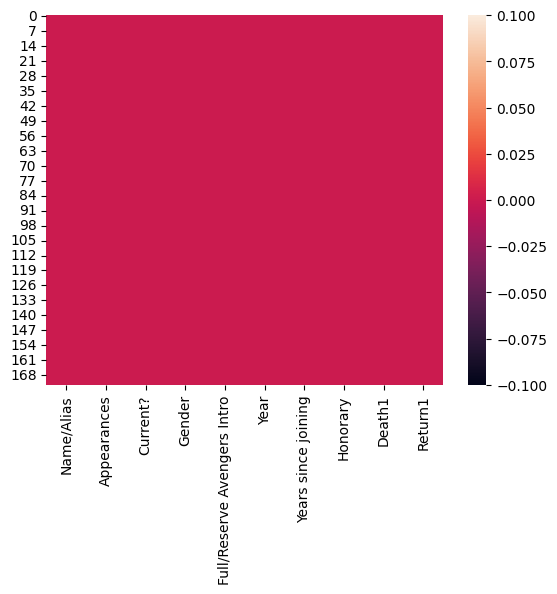

In [ ]:
sns.heatmap(df_new.isnull())

In [ ]:
print(df_new['Full/Reserve Avengers Intro'])

0      Sep-63
1      Sep-63
2      Sep-63
3      Sep-63
4      Sep-63
        ...  
168    13-Nov
169    14-Jan
170    14-Jan
171    14-Jan
172    15-Jan
Name: Full/Reserve Avengers Intro, Length: 173, dtype: object


In [ ]:
df_new['Return1'].fillna('N/A', inplace=True)

In [ ]:
df_new['Full/Reserve Avengers Intro'].fillna('N/A', inplace=True)

In [ ]:
df_new['Name/Alias'].fillna('N/A', inplace=True)

<Axes: >

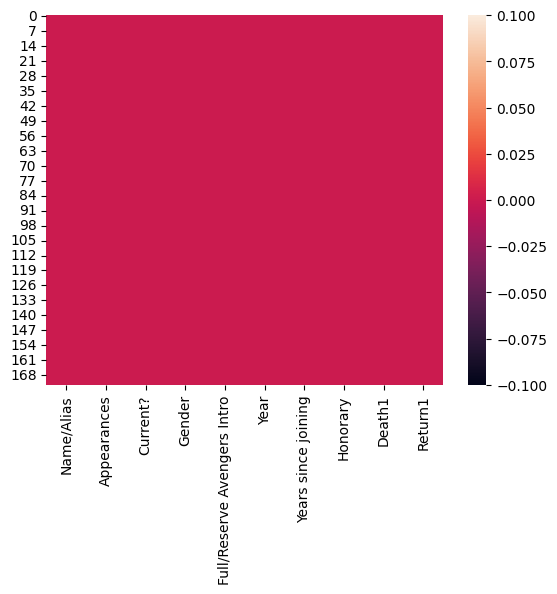

In [ ]:
sns.heatmap(df_new.isnull())

## 3) Análise dos Dados (visualização, análise exploratória)

In [ ]:
profile = ProfileReport(df_new, title="Avengers", html={"style": {"full_width": True}}, sort=None)

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file("Avengers.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

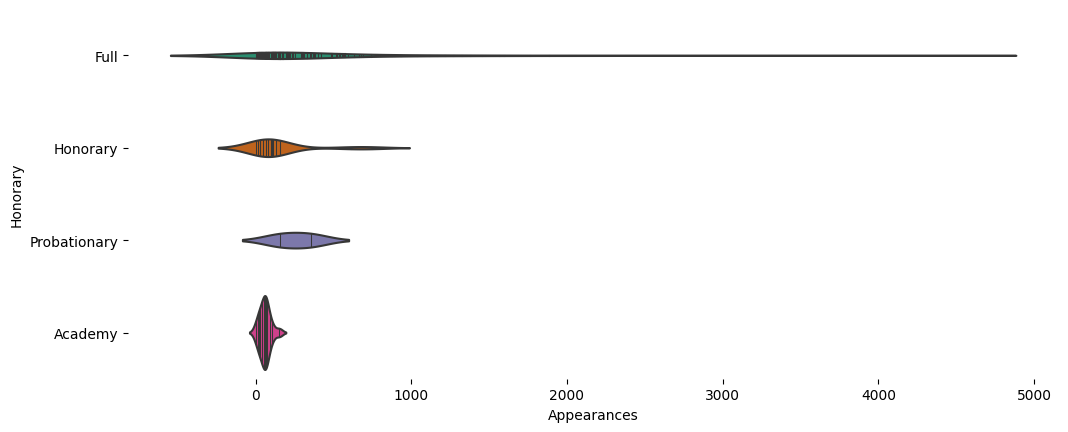

In [ ]:
# @title Honorary vs Appearances

figsize = (12, 1.2 * len(df_new['Honorary'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_new, x='Appearances', y='Honorary', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

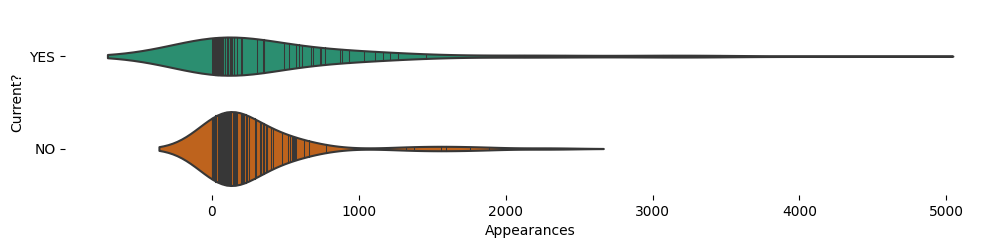

In [ ]:
# @title Current? vs Appearances

figsize = (12, 1.2 * len(df_new['Current?'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_new, x='Appearances', y='Current?', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

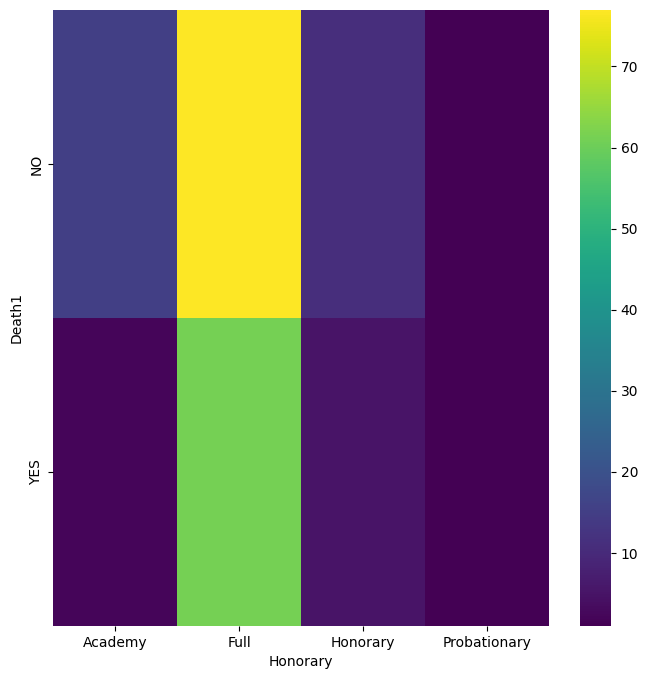

In [ ]:
# @title Honorary vs Death1

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Death1'].value_counts()
    for x_label, grp in df_new.groupby('Honorary')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Honorary')
_ = plt.ylabel('Death1')

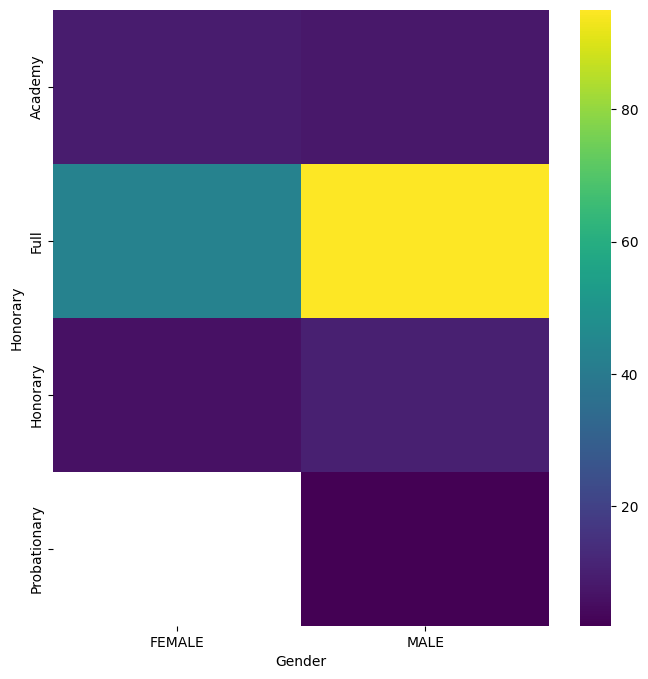

In [ ]:
# @title Gender vs Honorary

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Honorary'].value_counts()
    for x_label, grp in df_new.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('Honorary')

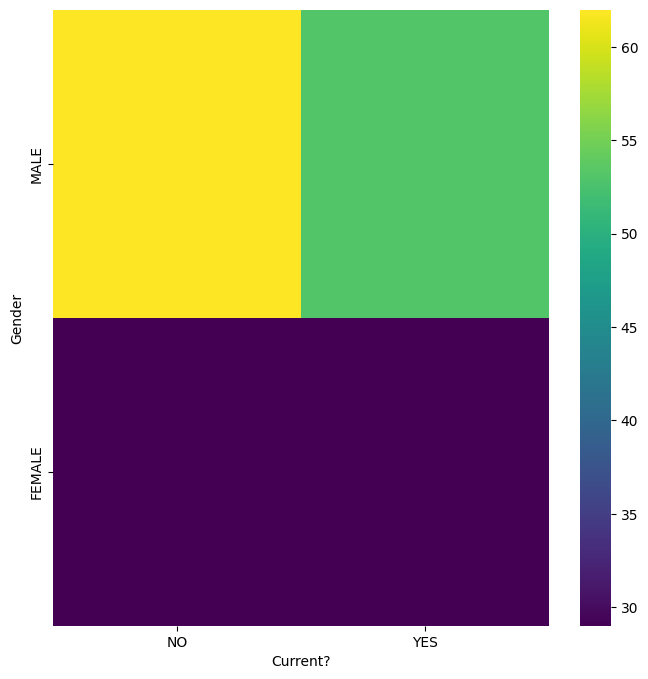

In [ ]:
# @title Current? vs Gender

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Gender'].value_counts()
    for x_label, grp in df_new.groupby('Current?')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Current?')
_ = plt.ylabel('Gender')

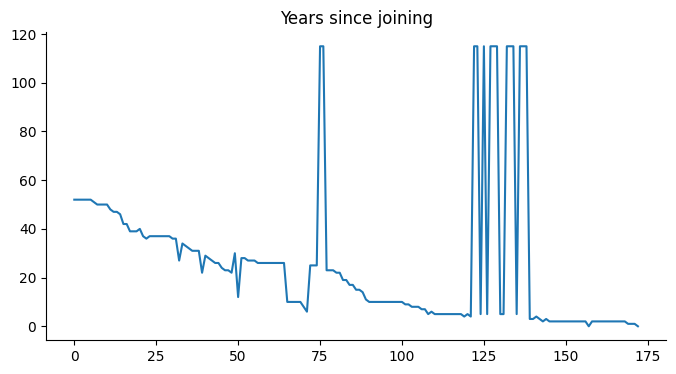

In [ ]:
# @title Years since joining

df_new['Years since joining'].plot(kind='line', figsize=(8, 4), title='Years since joining')
plt.gca().spines[['top', 'right']].set_visible(False)

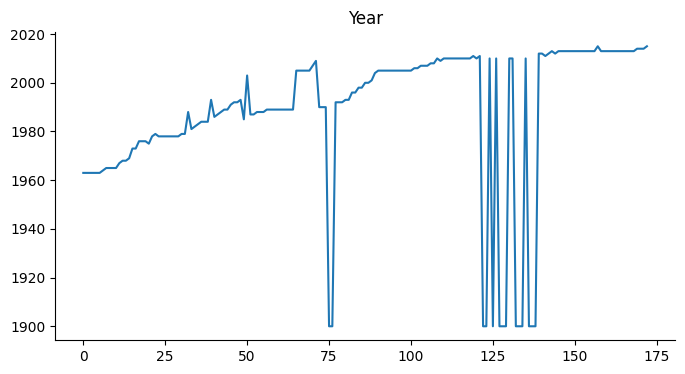

In [ ]:
# @title Year

df_new['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

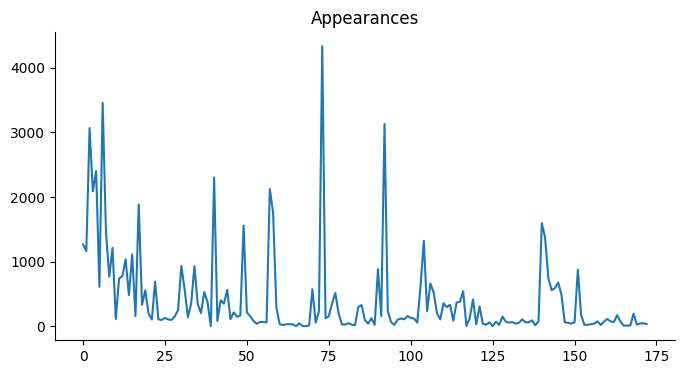

In [ ]:
# @title Appearances

df_new['Appearances'].plot(kind='line', figsize=(8, 4), title='Appearances')
plt.gca().spines[['top', 'right']].set_visible(False)

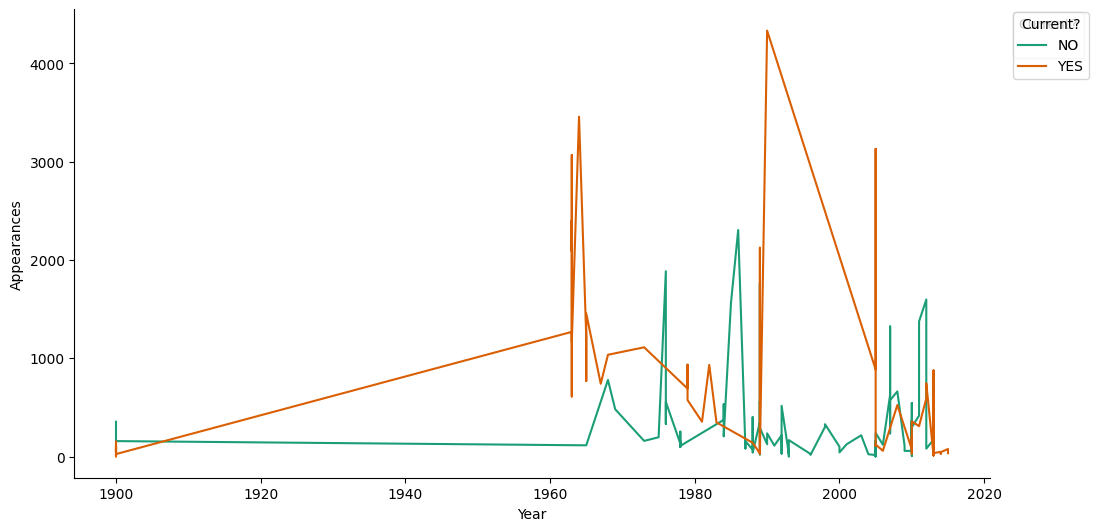

In [ ]:
# @title Year vs Appearances

def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Appearances']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_new.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Current?')):
  _plot_series(series, series_name, i)
  fig.legend(title='Current?', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Appearances')

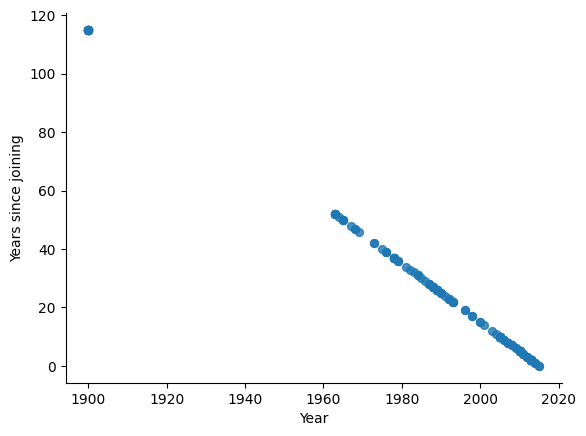

In [ ]:
# @title Year vs Years since joining

df_new.plot(kind='scatter', x='Year', y='Years since joining', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

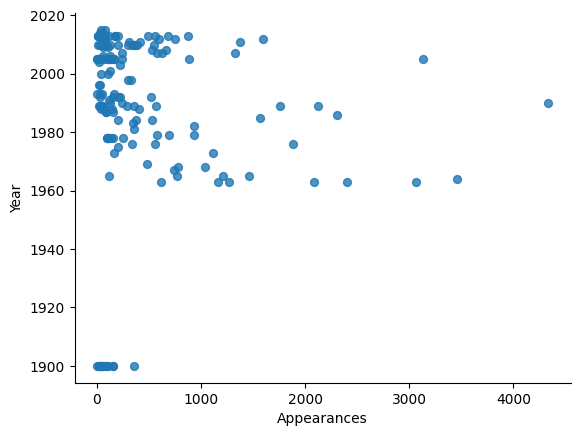

In [ ]:
# @title Appearances vs Year

df_new.plot(kind='scatter', x='Appearances', y='Year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

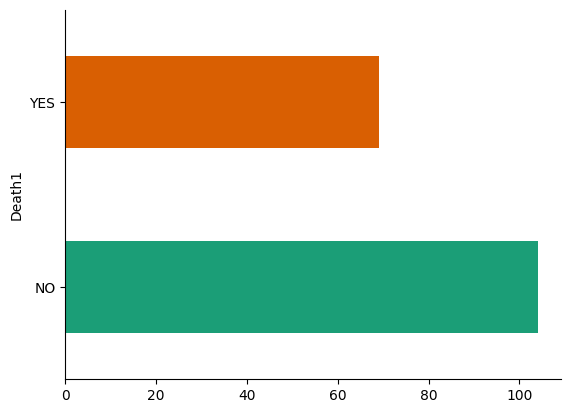

In [ ]:
# @title Death1

df_new.groupby('Death1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

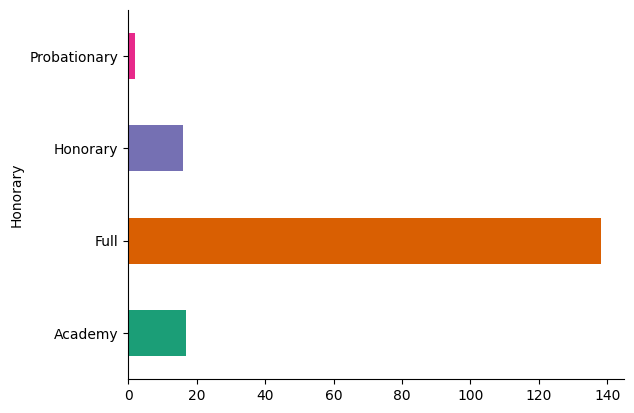

In [ ]:
# @title Honorary

df_new.groupby('Honorary').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

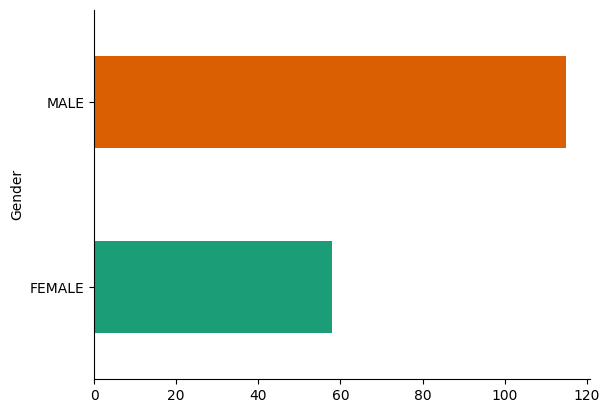

In [ ]:
# @title Gender

df_new.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

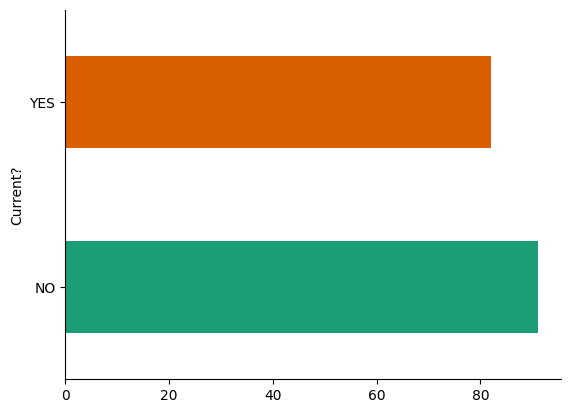

In [ ]:
# @title Current?

df_new.groupby('Current?').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

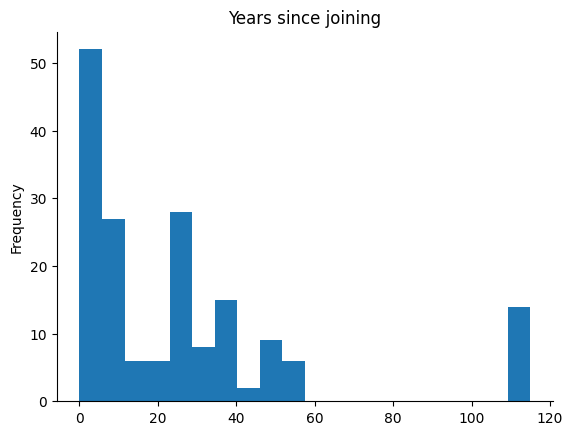

In [ ]:
# @title Years since joining

df_new['Years since joining'].plot(kind='hist', bins=20, title='Years since joining')
plt.gca().spines[['top', 'right',]].set_visible(False)

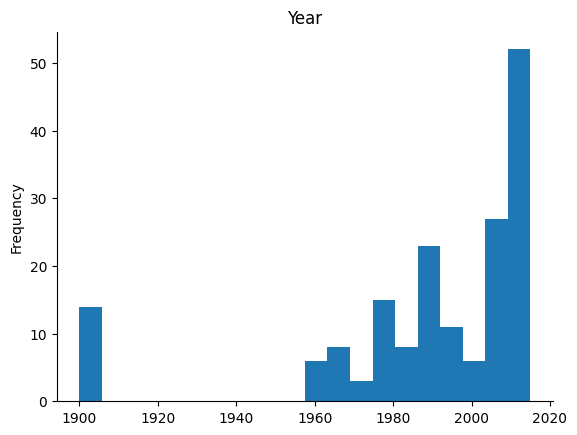

In [ ]:
# @title Year

df_new['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

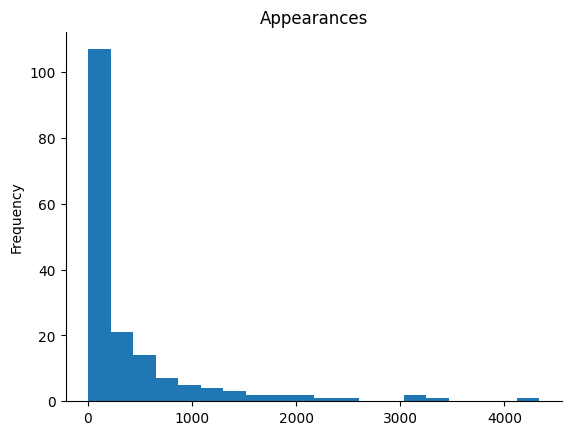

In [ ]:
# @title Appearances

df_new['Appearances'].plot(kind='hist', bins=20, title='Appearances')
plt.gca().spines[['top', 'right',]].set_visible(False)

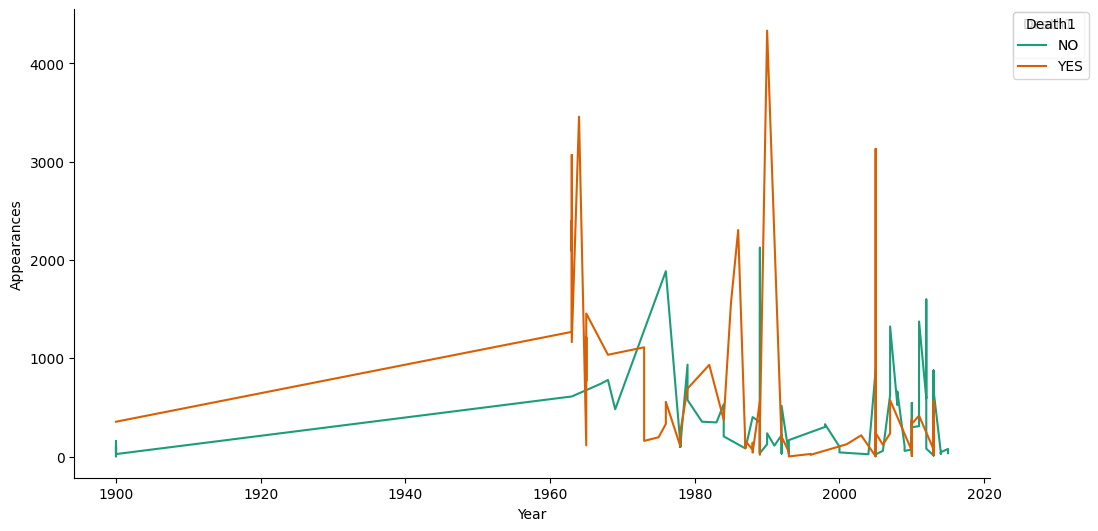

In [ ]:
# @title Year vs Appearances

def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Appearances']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_new.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Death1')):
  _plot_series(series, series_name, i)
  fig.legend(title='Death1', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Appearances')

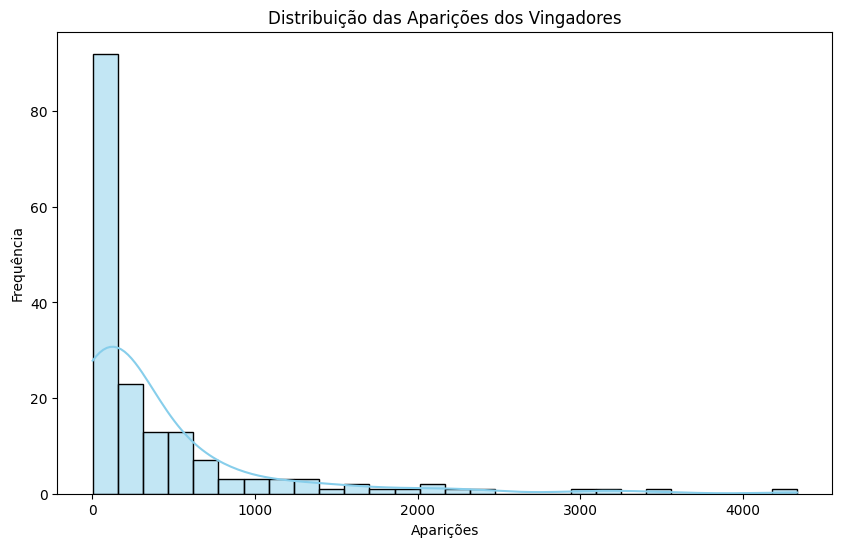

In [ ]:
# @title Distribuição das Aparições dos Vingadores

plt.figure(figsize=(10, 6))
sns.histplot(df_new['Appearances'], kde=True, color='skyblue')
plt.title('Distribuição das Aparições dos Vingadores')
plt.xlabel('Aparições')
plt.ylabel('Frequência')
plt.show()

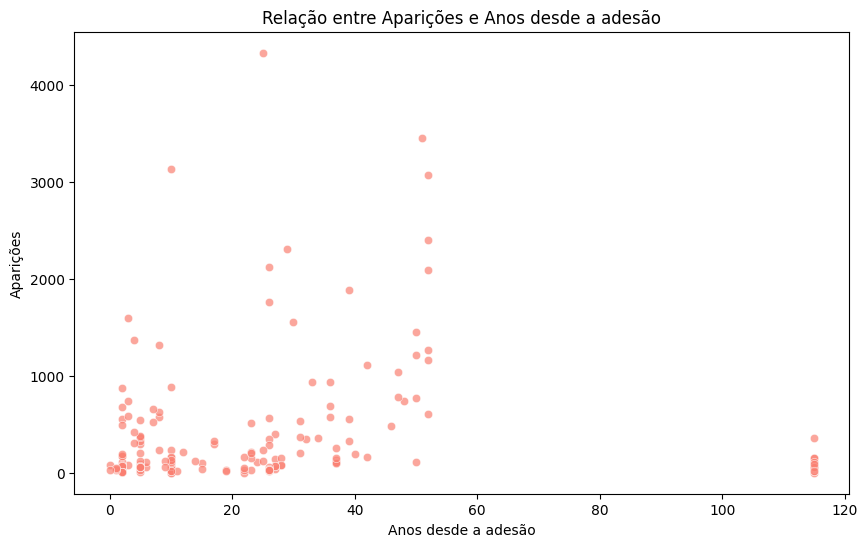

In [ ]:
# @title Relação entre Aparições e Anos desde a adesão

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years since joining', y='Appearances', data=df_new, color='salmon', alpha=0.7)
plt.title('Relação entre Aparições e Anos desde a adesão')
plt.xlabel('Anos desde a adesão')
plt.ylabel('Aparições')
plt.show()


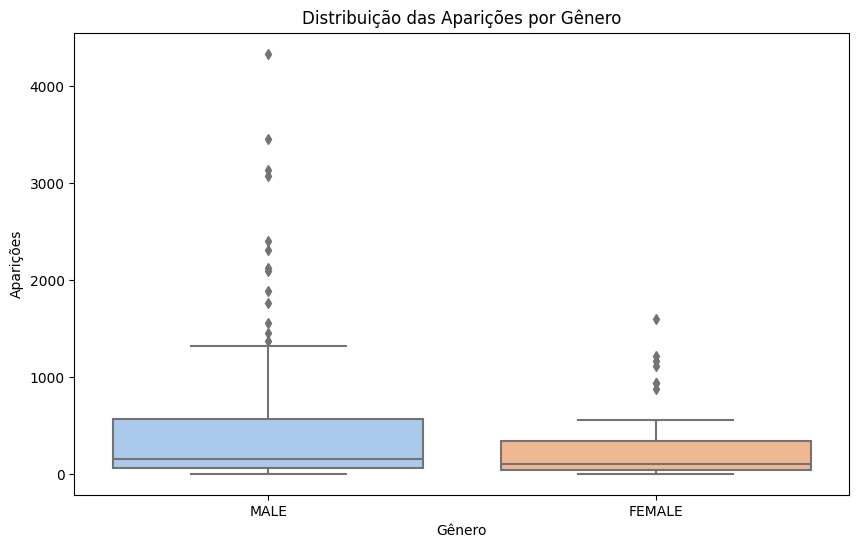

In [ ]:
# @title Distribuição das Aparições por Gênero

plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Appearances', data=df_new, palette='pastel')
plt.title('Distribuição das Aparições por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Aparições')
plt.show()

<ipython-input-148-20e1fa543c11>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df_new.corr(), dtype=bool))
<ipython-input-148-20e1fa543c11>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_new.corr(), annot=True, cmap='coolwarm', linewidths=0.5, mask=mask)


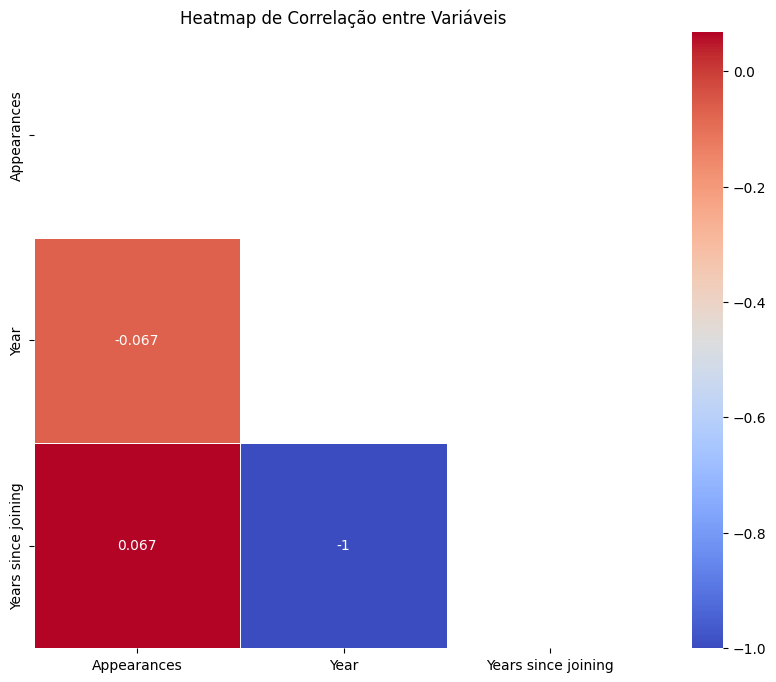

In [ ]:
# @title Heatmap de Correlação entre Variáveis

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(df_new.corr(), dtype=bool))
sns.heatmap(df_new.corr(), annot=True, cmap='coolwarm', linewidths=0.5, mask=mask)
plt.title('Heatmap de Correlação entre Variáveis')
plt.show()


## 4) Avaliação dos Resultados através de Insights (análise explanatória)

### **Foram avaliados alguns resultados:**

1. **Distribuição das Aparições dos Vingadores:**
   - A distribuição das aparições dos Vingadores mostra que a maioria deles teve um número relativamente baixo de aparições nos quadrinhos, com um pico em torno de 0 a 100 aparições. Isso sugere que há uma grande variedade na participação dos personagens nos quadrinhos, com alguns sendo muito mais proeminentes do que outros.

2. **Relação entre Aparições e Anos desde a adesão:**
   - O scatter plot mostra que não há uma relação clara entre o número de anos desde a adesão de um Vingador e suas aparições nos quadrinhos. Isso sugere que o tempo de adesão não é um fator determinante para a quantidade de aparições de um personagem nos quadrinhos.

3. **Distribuição das Aparições por Gênero:**
   - O box plot das aparições por gênero revela que, em média, os personagens masculinos tendem a ter mais aparições do que os personagens femininos. No entanto, há uma sobreposição significativa entre as distribuições de aparições de ambos os gêneros, indicando que há uma variedade de personagens femininos e masculinos com diferentes níveis de destaque nos quadrinhos.

4. **Heatmap de Correlação entre Variáveis:**
   - O heatmap de correlação mostra que não há correlações fortes entre as variáveis numéricas dos dados dos Vingadores. Isso sugere que as características dos personagens, como anos desde a adesão, número de aparições e ano de introdução, não estão fortemente relacionadas entre si.

5. **Death1 e Return1 têm uma correlação positiva alta:**
    - Isso sugere que existe uma relação forte entre o fato de um Vingador morrer (Death1) e retornar à vida (Return1). Isso pode indicar padrões recorrentes de ressurreição nos quadrinhos da Marvel.

6. **Year e Years since joining estão altamente correlacionados:**
    - A alta correlação entre o ano de introdução de um Vingador e os anos desde que se juntou aos Vingadores indica que, em geral, quanto mais tempo se passa desde a introdução do personagem, mais anos ele está associado aos Vingadores.

7. **Honorary tem um desequilíbrio alto (50.9%):**
    - A análise mostra que o status de Honorary dos Vingadores é altamente desequilibrado, com mais da metade dos personagens tendo esse status. Isso pode sugerir que a atribuição de status honorários é comum ou amplamente distribuída entre os personagens.

8. **Years since joining tem 2 (1.2%) zeros:**
    - Embora a maioria dos Vingadores tenha um valor positivo para os anos desde que se juntou, a presença de dois personagens com zero anos desde que se juntaram pode indicar algumas peculiaridades na forma como a adesão é registrada ou que esses personagens podem ter sido introduzidos recentemente na série.
